In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score

In [2]:
data= pd.read_csv('../data.csv')
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,99999999.0,741.0,2231892.0,29200.53,14.9,297996.0,750090.0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
2,206602.0,7290.0,896857.0,16367.74,17.3,215308.0,272448.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,217646.0,730.0,1184194.0,10855.08,19.6,122170.0,272052.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,548746.0,678.0,2559110.0,18660.28,22.6,437171.0,555038.0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


In [3]:
data.dtypes

Current Loan Amount               float64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Current Credit Balance            float64
Maximum Open Credit               float64
Term_Short Term                     int64
Years in current job_10+ years      int64
Years in current job_2 years        int64
Years in current job_3 years        int64
Years in current job_4 years        int64
Years in current job_5 years        int64
Years in current job_6 years        int64
Years in current job_7 years        int64
Years in current job_8 years        int64
Years in current job_9 years        int64
Years in current job_< 1 year       int64
Home Ownership_Own Home             int64
Home Ownership_Rent                 int64
Loan Status                         int64
dtype: object

In [4]:
##copying data
data1=data.copy()

### spliting data en X et Y

In [5]:
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

### spliting the data to train and test

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123, stratify=Y)

## dicision tree (CART)

In [7]:
dct = DecisionTreeClassifier()
params={'criterion' : ['gini', 'entropy'],
        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14, 15, 16, 17, None]}

##accuracy
grid_search_acc= GridSearchCV(estimator=dct, param_grid= params, scoring='accuracy',cv=15, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)


----------
best parameters:  {'criterion': 'entropy', 'max_depth': 7}
----------
[[1008 2235]
 [ 160 8839]]
----------
              precision    recall  f1-score   support

           0       0.86      0.31      0.46      3243
           1       0.80      0.98      0.88      8999

    accuracy                           0.80     12242
   macro avg       0.83      0.65      0.67     12242
weighted avg       0.82      0.80      0.77     12242

----------


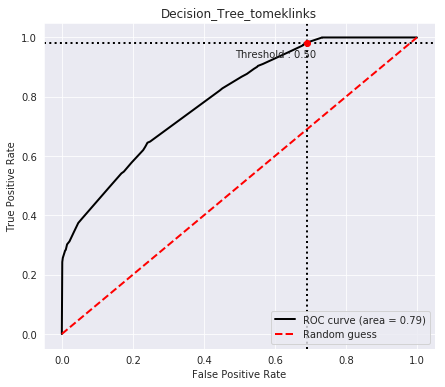

In [8]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Decision_Tree_tomeklinks')
plt.show()

In [9]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=dct, param_grid= params, scoring=rec_avg,cv=15, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [10]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'criterion': 'entropy', 'max_depth': None}
----------
[[1637 1606]
 [1610 7389]]
----------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3243
           1       0.82      0.82      0.82      8999

    accuracy                           0.74     12242
   macro avg       0.66      0.66      0.66     12242
weighted avg       0.74      0.74      0.74     12242

----------


In [11]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=dct, param_grid= params, scoring=prec_avg,cv=15, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'criterion': 'gini', 'max_depth': 4}
----------
[[ 867 2376]
 [   0 8999]]
----------
              precision    recall  f1-score   support

           0       1.00      0.27      0.42      3243
           1       0.79      1.00      0.88      8999

    accuracy                           0.81     12242
   macro avg       0.90      0.63      0.65     12242
weighted avg       0.85      0.81      0.76     12242

----------


In [26]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.set_ylim([0.6,0.95])
        ax.plot(grid_param_1[:-1], scores_mean[idx,:-1], '-o', label= name_param_2 + ': ' + str(val))
        ax.plot(19, scores_mean[idx, -1:], '*', label= 'crt' + '=' + str(val) + ' & mx_dpt=None')
        
    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

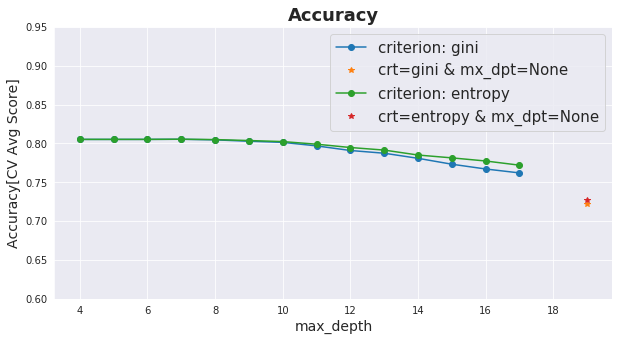

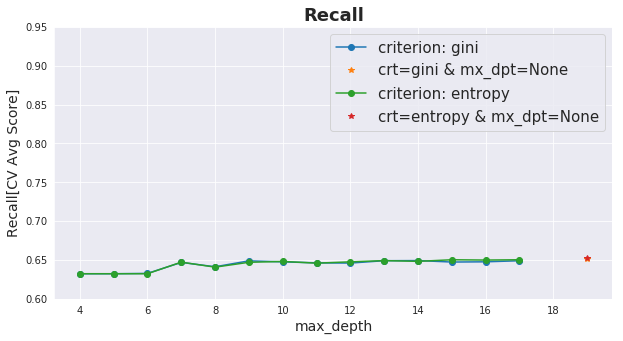

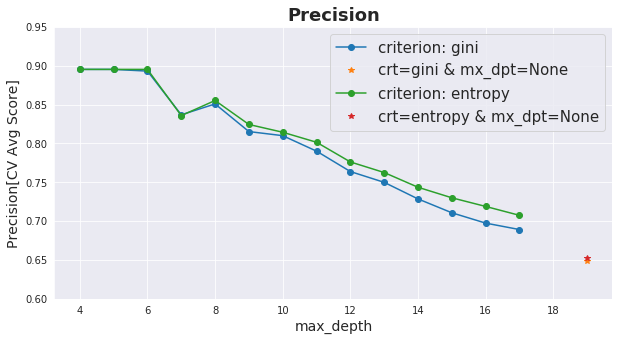

In [29]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['max_depth'], params['criterion'],  'max_depth', 'criterion', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['max_depth'], params['criterion'],  'max_depth', 'criterion', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['max_depth'], params['criterion'], 'max_depth', 'criterion', 'Precision')


In [15]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['criterion'], params['max_depth'])

In [16]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],},
                 index=index)

writer = pd.ExcelWriter('../tables_tomeklinks.xlsx')
df.to_excel(writer, 'DT_smote')
writer.save()
writer.close()

In [17]:
df

,Accuracy,Precision(Avg),Recall(Avg)
"[gini, 4]",0.805089,0.895221,0.632101
"[gini, 5]",0.805089,0.895221,0.632101
"[gini, 6]",0.805109,0.893031,0.632533
"[gini, 7]",0.805252,0.836750,0.646661
"[gini, 8]",0.804497,0.850739,0.641081
"[gini, 9]",0.802699,0.815163,0.648671
"[gini, 10]",0.801270,0.809890,0.647382
"[gini, 11]",0.796736,0.789947,0.646092
"[gini, 12]",0.790793,0.763689,0.645818
"[gini, 13]",0.787281,0.749781,0.648869
